# **CSE351 FINAL PROJECT**

## What makes people in a country happy?
Iman Ali, Rahul Raja & Acero

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

## **Load the data**
Data Source: https://worldhappiness.report

In [ ]:
## google colab command to import data
from google.colab import files
data1 = files.upload()
data2 = files.upload()
data3 = files.upload()
data4 = files.upload()
data5 = files.upload()

Saving 2015.csv to 2015.csv


Saving 2016.csv to 2016.csv


Saving 2017.csv to 2017.csv


Saving 2018.csv to 2018.csv


Saving 2019.csv to 2019.csv


In [ ]:
# Use pandas to load data frames

happiness15 = pd.read_csv("2015.csv")
happiness16 = pd.read_csv("2016.csv")
happiness17 = pd.read_csv("2017.csv")
happiness18 = pd.read_csv("2018.csv")
happiness19 = pd.read_csv("2019.csv")

## happiness15 = pd.read_csv("world_happiness_data/2015.csv")
## happiness16 = pd.read_csv("world_happiness_data/2016.csv")
## happiness17 = pd.read_csv("world_happiness_data/2017.csv")
## happiness18 = pd.read_csv("world_happiness_data/2018.csv")
## happiness19 = pd.read_csv("world_happiness_data/2019.csv")

# **EDA**
### Get familiar with the dataset and decide what features and observations will be useful 
### (by Iman Ali)

In [ ]:
# Display first 5 rows of the 2015 data set
happiness15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# Display first 5 rows of the 2019 data set
happiness19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# Above exploration shows that different years have different attributes
# Data columns are inconsistent for each year

# Check name and type of columns in every years data
happiness15.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
happiness16.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
happiness17.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [ ]:
happiness18.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
happiness19.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

## **Clean and Merge the data (Task 1)**
### By Iman Ali

In [ ]:
# Format all data to be uniform and consistent with each other
# by renaming columns to :  
# Country - Rank - Score - GDP per Capita - Life Expectancy - Family/Social Support - Freedom - Corruption - Generosity 

# This step will eliminate conflicts when merging the data sets
# and filter only the useful features/observations of the data for our analysis.

# 2015 
happiness15.rename(columns={
    "Country": "Country",
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "GDP per Capita",
    "Health (Life Expectancy)": "Life Expectancy",
    "Family": "Family/Social Support",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Corruption",
    "Generosity": "Generosity"
},inplace=True)
happiness15.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1, inplace=True)

# 2016
happiness16.rename(columns={
    "Country": "Country",
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "GDP per Capita",
    "Health (Life Expectancy)": "Life Expectancy",
    "Family": "Family/Social Support",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Corruption",
    "Generosity": "Generosity"
},inplace=True)
happiness16.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1, inplace=True)

# 2017
happiness17.rename(columns={
    "Country": "Country",
    "Happiness.Rank": "Rank",
    "Happiness.Score": "Score",
    "Economy..GDP.per.Capita.": "GDP per Capita",
    "Health..Life.Expectancy.": "Life Expectancy",
    "Family": "Family/Social Support",
    "Freedom": "Freedom",
    "Trust..Government.Corruption.": "Corruption",
    "Generosity": "Generosity"
},inplace=True)
happiness17.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

# 2018
happiness18.rename(columns={
    "Country or region": "Country",
    "Overall rank": "Rank",
    "Score": "Score",
    "GDP per capita": "GDP per Capita",
    "Healthy life expectancy": "Life Expectancy",
    "Social support": "Family/Social Support",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption",
    "Generosity": "Generosity"
},inplace=True)

# 2019
happiness19.rename(columns={
    "Country or region": "Country",
    "Overall rank": "Rank",
    "Score": "Score",
    "GDP per capita": "GDP per Capita",
    "Healthy life expectancy": "Life Expectancy",
    "Social support": "Family/Social Support",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption",
    "Generosity": "Generosity"
},inplace=True)

In [ ]:
# Add year column to each data frame
# So after data is merged, its year information is available

happiness15["Year"] = 2015
happiness16["Year"] = 2016
happiness17["Year"] = 2017
happiness18["Year"] = 2018
happiness19["Year"] = 2019

In [ ]:
# Merging data
# Creating one dataframe table for all of the years combined

frames = [happiness15, happiness16, happiness17, happiness18, happiness19]
happiness = pd.concat(frames)
happiness

,Country,Rank,Score,GDP per Capita,Family/Social Support,Life Expectancy,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [ ]:
# Once we have all the data in a single set,
# Clean the data

# Confirm there are no duplicates in the data set
happiness.duplicated().any()

False

In [ ]:
# Check missing values in the data.
happiness.isna().sum()

Country                  0
Rank                     0
Score                    0
GDP per Capita           0
Family/Social Support    0
Life Expectancy          0
Freedom                  0
Corruption               1
Generosity               0
Year                     0
dtype: int64

In [ ]:
# Check the missing value of corruption
happiness[happiness.Corruption.isna()]

,Country,Rank,Score,GDP per Capita,Family/Social Support,Life Expectancy,Freedom,Corruption,Generosity,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [ ]:
# Mean imputation
# Replace NaN with mean corruption for United Arab Emirates
mean_corrup = happiness[happiness.Country == 'United Arab Emirates'].Corruption.mean()

happiness["Corruption"].fillna(mean_corrup, inplace = True)
happiness[(happiness.Country == 'United Arab Emirates') & (happiness.Year == 2018)]

,Country,Rank,Score,GDP per Capita,Family/Social Support,Life Expectancy,Freedom,Corruption,Generosity,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,0.311982,0.186,2018


In [ ]:
# Double check no null values anymore
happiness.isna().sum()

Country                  0
Rank                     0
Score                    0
GDP per Capita           0
Family/Social Support    0
Life Expectancy          0
Freedom                  0
Corruption               0
Generosity               0
Year                     0
dtype: int64

## **Central Tendencies of happiness score over the years?  (Task 2)**
### Did they increase or decrease?
### By Iman Ali

In [ ]:
# Generate descriptive statistics of happiness score overall
happiness[['Score']].describe()

,Score
count,782.000000
mean,5.379018
std,1.127456
min,2.693000
25%,4.509750
50%,5.322000
75%,6.189500
max,7.769000


In [ ]:
# Generate descriptive statistics of happiness score each year
happinessYearly = happiness.groupby('Year')
happinessYearly['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


In [ ]:
# Yearly mean
happinessYearly = happinessYearly['Score'].mean()
happinessYearly

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Score, dtype: float64

(5.3, 5.43)

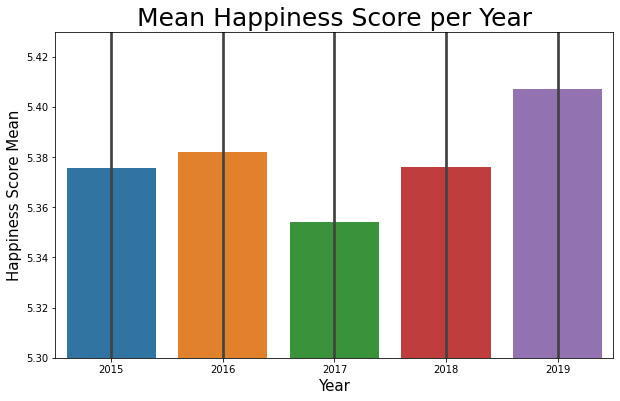

In [ ]:
# Plotting the trend of happiness score over the years 
plt.figure(figsize=(10,6))
graph = sns.barplot(x="Year", y="Score", data=happiness)
plt.title("Mean Happiness Score per Year", fontsize=25);
plt.xlabel("Year", fontsize=15)
plt.ylabel("Happiness Score Mean", fontsize=15)


# Exaggerate the Y axis to show the slight difference in mean values
graph.set_ylim(5.3, 5.43)

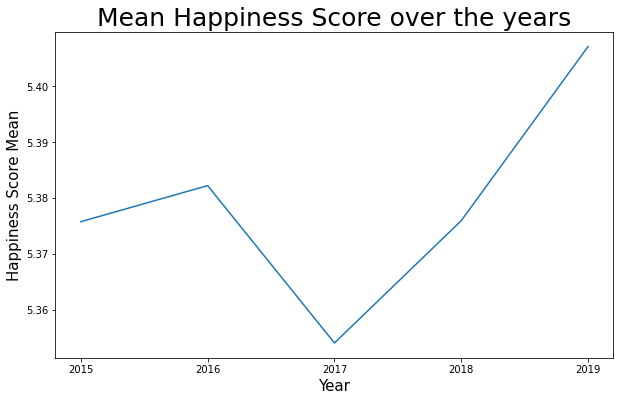

In [ ]:
# Plot the mean of Score of all countries or regions from 2015 to 2018
plt.figure(figsize=(10, 6))
plt.plot(happinessYearly, label="Mean Happiness score")

plt.title("Mean Happiness Score over the years", fontsize=25)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Happiness Score Mean", fontsize=15)
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

In [ ]:
# Mean seems to increase each year by a very small amount
# The only exception is from 2016 to 2017 when the mean happiness
# score drops a bit, but then continues increasing again.

In [ ]:
# Yearly median
happinessMedian = happiness.groupby('Year')['Score'].median()
happinessMedian

Year
2015    5.2325
2016    5.3140
2017    5.2790
2018    5.3780
2019    5.3795
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


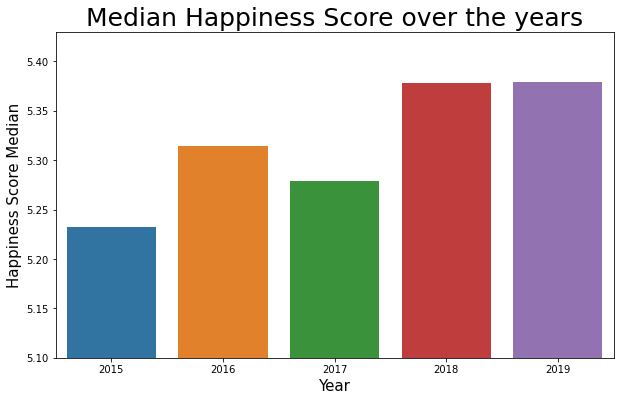

In [ ]:
# Plot the median of Score of all countries or regions from 2015 to 2018
plt.figure(figsize=(10, 6))
graph = sns.barplot(["2015", "2016", "2017", "2018", "2019"], happinessMedian)

# Exaggerate the Y axis to show the slight difference in median values
graph.set_ylim(5.10, 5.43)

plt.title("Median Happiness Score over the years", fontsize=25)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Happiness Score Median", fontsize=15)
plt.show()

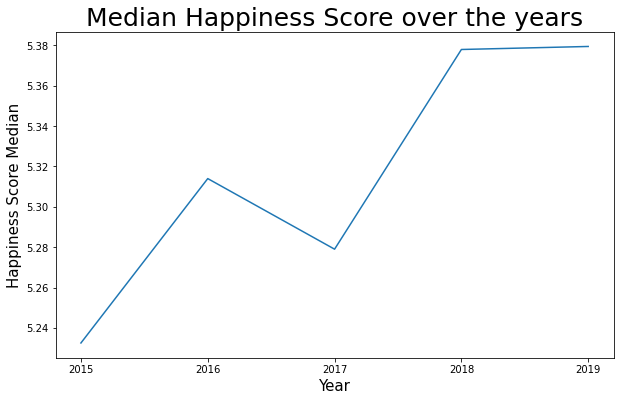

In [ ]:
# Plot the median of Score of all countries or regions from 2015 to 2018
plt.figure(figsize=(10, 6))
plt.plot(happinessMedian, label="Median Happiness score")

plt.title("Median Happiness Score over the years", fontsize=25)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Happiness Score Median", fontsize=15)
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

In [ ]:
# Median follows the same trend as mean
# The median happiness score increases from 2015-2019
# with the exception of the year 2016 - 2017

## Analyzing Rankings (Task 3)
### by Rahul Raja

In [ ]:
# Which countries have stable rankings over the years? 

## we are going to analyze the overall change in rankings over the years
happiness_copy = happiness.copy()

grouped_happiness = happiness_copy.groupby("Country")["Country"].count()
grouped_happiness = grouped_happiness[grouped_happiness == 5]

hap15 = happiness15[['Country', 'Rank']]
hap16 = happiness16[['Country', 'Rank']]
hap17 = happiness17[['Country', 'Rank']]
hap18 = happiness18[['Country', 'Rank']]
hap19 = happiness19[['Country', 'Rank']]


countries = grouped_happiness.keys()
## print(countries)
total_change = []

##  Used for testing #### 
# country = "Canada"
# print(hap15.loc[hap15['Country'] == country].iat[0,1])
# print(hap16.loc[hap16['Country'] == country].iat[0,1])
# print(hap17.loc[hap17['Country'] == country].iat[0,1])
# print(hap18.loc[hap18['Country'] == country].iat[0,1])
# print(hap19.loc[hap19['Country'] == country].iat[0,1])


## iterating through all the countries to calculate the overall rank change from the year range [2015, 2019]
for i in range(len(countries)):
    country = countries[i]
    diff1 = abs(hap15.loc[hap15['Country'] == country].iat[0,1]- hap16.loc[hap16['Country'] == country].iat[0,1])
    ## print(diff1)
    diff2 = abs(hap16.loc[hap16['Country'] == country].iat[0,1]- hap17.loc[hap17['Country'] == country].iat[0,1])
    diff3 = abs(hap17.loc[hap17['Country'] == country].iat[0,1]- hap18.loc[hap18['Country'] == country].iat[0,1])
    diff4 = abs(hap18.loc[hap18['Country'] == country].iat[0,1]- hap19.loc[hap19['Country'] == country].iat[0,1])
    finalDiff = diff1 + diff2 + diff3 + diff4
    ## print(finalDiff)
    total_change.append(finalDiff)

## creating a new dataframe to store this information
data={"Countries":countries, "Rank_Change":total_change}
stable_table = pd.DataFrame(data)

## sort it by ascending values (low -> high)
stable_table = stable_table.sort_values(by=["Rank_Change"], ascending=True)
    
stable_table.head(20)  
    
## Rank Change is defined as the total amount of variation in the ranks between 2015 - 2019, which is a good measure for stable ranking.
## The top 20 countries with the most stable rankings are shown below.
## The top 5 include New Zealand, Iceland, Netherlands, Australia, and Canada.








,Countries,Rank_Change
91,New Zealand,1
53,Iceland,2
90,Netherlands,2
5,Australia,3
23,Canada,4
107,Rwanda,4
119,Sweden,5
120,Switzerland,5
6,Austria,5
41,Finland,5


In [ ]:
## Which countries improved their rankings? 

## The way we are going to analyze this is by looking at overall chage from inital rank in 2015 to the last ranking that take place in 2019

## combining both 2015 and 2019 data together
frame2 = [happiness15, happiness19]
diff = pd.concat(frame2)

grouped_happiness = diff.groupby("Country")["Country"].count()
grouped_happiness = grouped_happiness[grouped_happiness == 2] ## use the info that is included in both of the years

countries = grouped_happiness.keys()

hap15 = happiness15[['Country', 'Rank']]
hap19 = happiness19[['Country', 'Rank']]
rank_change = []

#### Testing ### 
## country = "Afghanistan"
## print(hap15.loc[hap15['Country'] == country].iat[0,1])
## print(hap19.loc[hap19['Country'] == country].iat[0,1])

## iterating through to calculate the differences with the countries listed
for i in range(len(countries)):
  country = countries[i]
  rc = hap15.loc[hap15['Country'] == country].iat[0,1] - hap19.loc[hap19['Country'] == country].iat[0,1] ## if pos, then inc, else then dec
  rank_change.append(rc)

## print(rank_change)

## creating a dataframe to store the results   
data={"Countries":countries, "Overall_Change":rank_change}
overall_change_table = pd.DataFrame(data)


overall_change_table = overall_change_table.sort_values(by=["Overall_Change"], ascending=False) ## Since pos values are ones that increased rankings
    
overall_change_table.head(20)

## Table below shows the top 20 countries that have increased their happiness rankings from 2015 - 2019
## Top 5 countries include Benin, Ivory Coast, Honduras, Hungary, and Gabon




,Countries,Overall_Change
12,Benin,53
64,Ivory Coast,52
53,Honduras,46
55,Hungary,42
45,Gabon,39
111,Romania,38
22,Cameroon,37
19,Burkina Faso,37
18,Bulgaria,37
74,Latvia,36


## Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc. (Task 4)
### by Rahul Raja

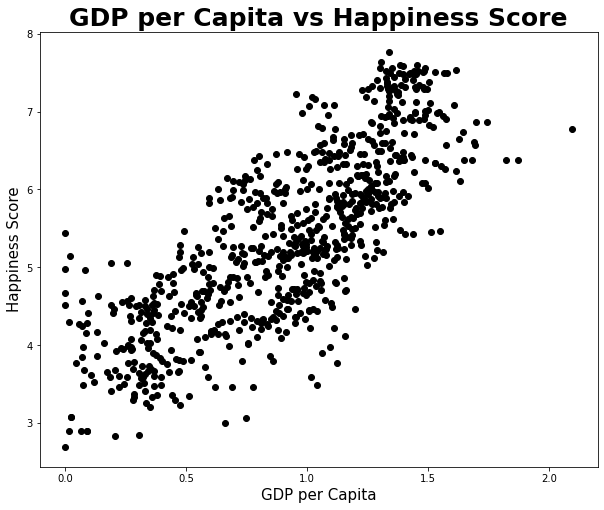

In [ ]:
# Testing the relationship between gdp and happiness scores

h_score = happiness["Score"]
gdp = happiness["GDP per Capita"]

plt.figure(figsize=(10, 8))
plt.plot(gdp,h_score , 'o', color='black'); 
plt.title("GDP per Capita vs Happiness Score",fontweight='bold', fontsize=25)
plt.xlabel("GDP per Capita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.show()

In [ ]:
# Correlation between gdp and happiness is 0.789

corr1, _ = pearsonr(gdp, h_score)
print('Pearsons correlation: %.3f' % corr1) 

Pearsons correlation: 0.789


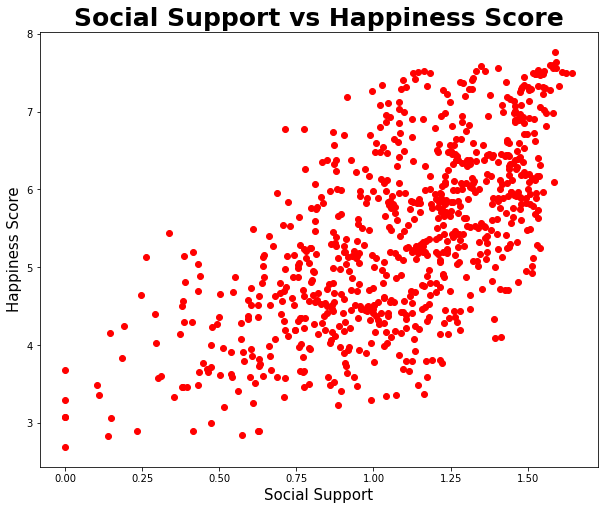

In [ ]:
# Testing the relationship between social_support and happiness scores

social_support = happiness["Family/Social Support"]

plt.figure(figsize=(10, 8))
plt.plot(social_support ,h_score , 'o', color='red'); 
plt.title("Social Support vs Happiness Score",fontweight='bold', fontsize=25)
plt.xlabel("Social Support", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.show()

In [ ]:
# Correlation between social support and happiness is 0.649, which is not as strong

corr2, _ = pearsonr(social_support, h_score)
print('Pearsons correlation: %.3f' % corr2) 

Pearsons correlation: 0.649


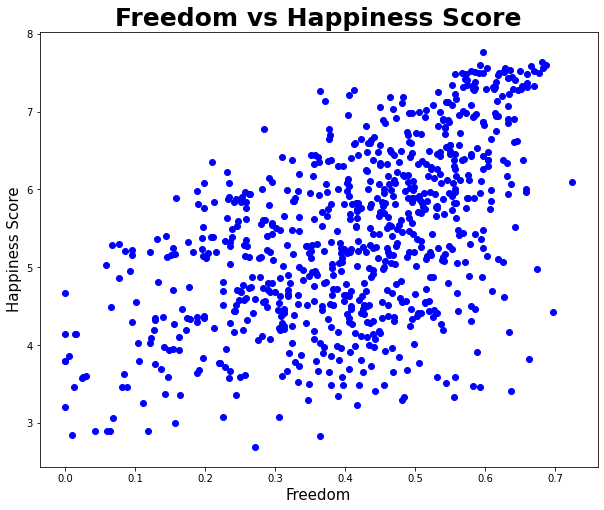

In [ ]:
## Testing the relationship between freedom and happiness scores

freedom = happiness["Freedom"]

plt.figure(figsize=(10, 8))
plt.plot(freedom ,h_score , 'o', color='blue'); 
plt.title("Freedom vs Happiness Score",fontweight='bold', fontsize=25)
plt.xlabel("Freedom", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.show()

In [ ]:
# Correlation between freedom and happiness is 0.551, which is not as strong as the other two

corr3, _ = pearsonr(freedom, h_score)
print('Pearsons correlation: %.3f' % corr3)

Pearsons correlation: 0.551


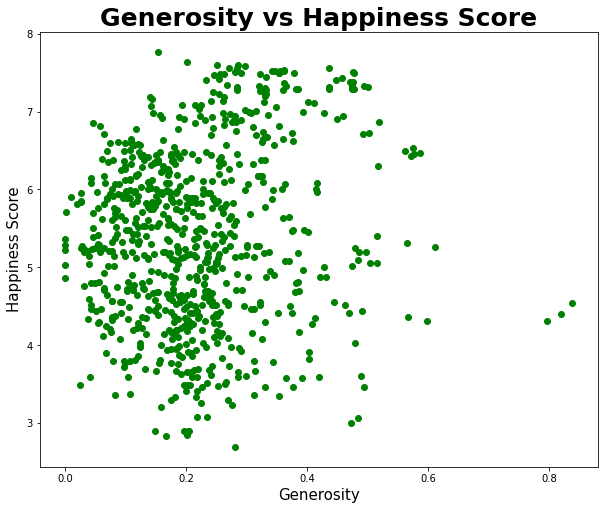

In [ ]:
## Testing the relationship between generosity and happiness scores
corruption = happiness["Generosity"]

plt.figure(figsize=(10, 8))
plt.plot(corruption ,h_score , 'o', color='green'); 
plt.title("Generosity vs Happiness Score",fontweight='bold', fontsize=25)
plt.xlabel("Generosity", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.show()

In [ ]:
# Correlation between generosity and happiness is 0.138, which is not correlated at all

corr4, _ = pearsonr(corruption, h_score)
print('Pearsons correlation: %.3f' % corr4) 

Pearsons correlation: 0.138


## Features contributing to happiness (Task 5)
### by Acero

In [ ]:
# What Features correlate to happiness? 
# Dictionary for graph
featureDict = {}
#What is the correlation between happiness and GDP per capita? Use Spearman because data is an interval type
hapScore = happiness["Score"]
gdp = happiness["GDP per Capita"]
gdpCorr, _ = pearsonr(gdp, hapScore)
featureDict["GDp per Capita"] = gdpCorr
print('GDP per Capita Pearsons correlation: %.3f' % gdpCorr) 

GDP per Capita Pearsons correlation: 0.789


In [ ]:
# Correlation between family and happiness 
fam = happiness["Family/Social Support"]
famCorr, _ = pearsonr(fam, hapScore)
featureDict["Family"] = famCorr
print('Family value Pearsons correlation: %.3f' % famCorr)

Family value Pearsons correlation: 0.649


In [ ]:
# Correlation between life expectancy and happiness
lifeExp_val = happiness["Life Expectancy"]
LifeCorr, _ = pearsonr(lifeExp_val, hapScore)
featureDict["Life Expectancy"] = LifeCorr
print('Life Expectancy value Pearsons correlation: %.3f' % LifeCorr)

Life Expectancy value Pearsons correlation: 0.742


In [ ]:
# Correlation between Freedom	and happiness
freedom_val = happiness["Freedom"]
freedomCorr = pearsonr(freedom_val, hapScore)
featureDict["Freedom"] = freedomCorr[0]
print('Freedom value Pearsons correlation: %.3f' % freedomCorr[0])

Freedom value Pearsons correlation: 0.551


In [ ]:
# Correlation between Corruption and happiness
corruption_val = happiness["Corruption"]
corruptionCorr = pearsonr(corruption_val, hapScore)
featureDict["Trust"] = corruptionCorr[0]
print('Trust in government value Pearsons correlation: %.3f' % corruptionCorr[0])

Trust in government value Pearsons correlation: 0.400


In [ ]:
#Correlation between Generosity	and happiness 
generosity_val = happiness["Generosity"]
generosityCorr = pearsonr(generosity_val, hapScore)
featureDict["Generosity"] = generosityCorr[0]
print('Generosity value Pearsons correlation: %.3f' % generosityCorr[0])

Generosity value Pearsons correlation: 0.138


In [ ]:
#Year and happiness?
year_val = happiness["Year"]
yearCorr = pearsonr(year_val, hapScore)
featureDict["Year"] = yearCorr[0]
print('Year value Pearsons correelation: %.3f' % yearCorr[0])

Year value Pearsons correelation: 0.007


In [ ]:
print(featureDict)

{'GDp per Capita': 0.7892839967085103, 'Family': 0.648799344751751, 'Life Expectancy': 0.742455742204549, 'Freedom': 0.5512580029074602, 'Trust': 0.40002621428627116, 'Generosity': 0.13757773385931887, 'Year': 0.0070646866931392835}


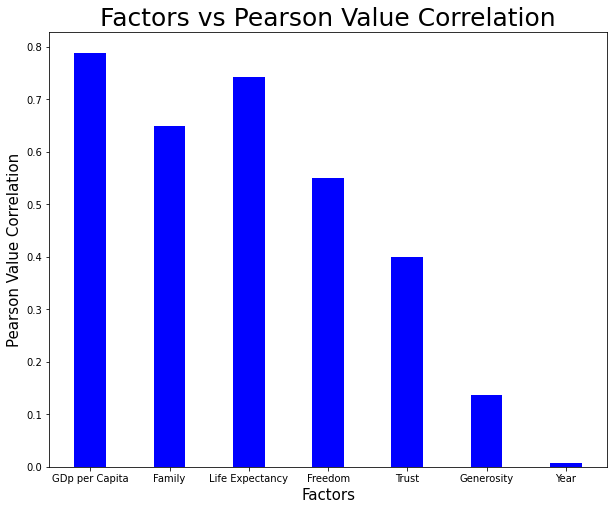

In [ ]:
factors = list(featureDict.keys())
corrVals = list(featureDict.values())
fig = plt.figure(figsize = (10, 8))
plt.bar(factors, corrVals, color ='blue', width = 0.4)

plt.xlabel("Factors", fontsize = 15)
plt.ylabel("Pearson Value Correlation", fontsize=15)
plt.title("Factors vs Pearson Value Correlation", fontsize=25)
plt.show()

# **If you are the president of a country, what would you do to make citizens happier?**

Judging by the factors that are most correlated with the happiness values, we can see that GDP per Capita, as well as Life expectancy are the most correlated. That means increasing GDP per Capita, as well as life expectancy may increase happiness in citizens.

To increase GDP per Capita:
Because GDP per Capita is the GDP divided by the population, one way to increase the value is by increasing the GDP by creating an economy that produces more products. By investing in industries, especially those that create many exports, the GDP can be increased. Increasing consumption in the country will also raise the GDP per Capita, and this can be done by adopting consumption stimulating policies, such as giving out stimulus checks.

To increase life Expectancy:
Invest in better health infrastructure, as well as health care. 

# **Modeling and Question Answering**
predict the happiness rankings using machine learning approach

### Splitting into training and testing data (by Iman Ali)

In [ ]:
 # Split into training and testing sets

# Training set => 2015 - 2018
# Testing set => 2019

# Extract training set
training = happiness[happiness.Year < 2019]

# Target variable 'Rank'. But we will predict the 'Score' and then calculate rank by 
# ordering scores in ascending order. Therefore use 'Score' as y
# Therefore Y_train has values of 'Score', and X_train with all other useful fields
Y_train = training[['Score']]
X_train = training[["GDP per Capita", "Life Expectancy", 'Family/Social Support', 'Freedom']]


# Display X_train
X_train

,GDP per Capita,Life Expectancy,Family/Social Support,Freedom
0,1.39651,0.94143,1.34951,0.66557
1,1.30232,0.94784,1.40223,0.62877
2,1.32548,0.87464,1.36058,0.64938
3,1.45900,0.88521,1.33095,0.66973
4,1.32629,0.90563,1.32261,0.63297
...,...,...,...,...
151,0.44200,0.34300,1.07300,0.24400
152,0.45500,0.38100,0.99100,0.48100
153,0.33700,0.17700,0.60800,0.11200
154,0.02400,0.01000,0.00000,0.30500


In [ ]:
# Display Y_train (answers)
Y_train

,Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
151,3.355
152,3.303
153,3.254
154,3.083


In [ ]:
# Extract testing set (2019)
testing = happiness[happiness.Year == 2019]

# Similar to training data,
# Y_test with values of 'Score', and X_test with all other fields
Y_test = testing[['Score']]
X_test = testing[["GDP per Capita", "Life Expectancy", 'Family/Social Support', 'Freedom']]


# Display X_test
X_test

,GDP per Capita,Life Expectancy,Family/Social Support,Freedom
0,1.340,0.986,1.587,0.596
1,1.383,0.996,1.573,0.592
2,1.488,1.028,1.582,0.603
3,1.380,1.026,1.624,0.591
4,1.396,0.999,1.522,0.557
...,...,...,...,...
151,0.359,0.614,0.711,0.555
152,0.476,0.499,0.885,0.417
153,0.350,0.361,0.517,0.000
154,0.026,0.105,0.000,0.225


In [ ]:
# Display Y_test (answers)
Y_test

,Score
0,7.769
1,7.600
2,7.554
3,7.494
4,7.488
...,...
151,3.334
152,3.231
153,3.203
154,3.083


## **Multiple Linear Regression**
### Model 1 (by Iman Ali)

In [ ]:
################################# Set up a multiple linear regression model to train ################################

# Use linear regression from the sklearn library 
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Use the coefficient and intercept to determine the y = mx + c linear fit
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)



Coefficients:  [[1.14588287 1.16559883 0.5446503  1.85021572]]
Intercept:  [2.29937624]


In [ ]:
############################ Predict happines rank for each country in 2019 ############################

# Use the model to predict values of happiness score for the testing set
score_pred = lin_reg.predict(X_test)
score_pred = score_pred.flatten()
score_pred

array([6.95122833, 6.99713132, 7.18000241, 7.05458858, 6.92298988,
       7.07886789, 6.93672383, 6.91876274, 6.97478823, 6.84803344,
       6.95277675, 6.42395226, 6.4398202 , 7.10143906, 6.65804378,
       6.98204113, 6.73089779, 6.69677995, 6.5937132 , 6.48129611,
       6.80317813, 6.82484733, 6.05076726, 6.64299524, 6.36057699,
       6.10595869, 5.76664591, 6.38503614, 6.98627515, 6.48888671,
       6.41678764, 5.88998882, 6.39147266, 7.25619571, 5.60091315,
       6.23104534, 6.61210253, 6.19116497, 6.250234  , 6.38856168,
       6.03450813, 6.03499706, 6.0458978 , 6.72473665, 5.59439946,
       5.76933351, 6.22896374, 6.11832001, 6.37847519, 5.99214983,
       6.5905545 , 6.26565152, 5.8923751 , 5.95584326, 6.48364917,
       5.93181638, 6.19792008, 6.68433911, 5.61139602, 6.0731395 ,
       5.61543657, 5.77684726, 5.93914646, 6.41462242, 5.93057784,
       6.58223663, 4.76041201, 5.90998472, 5.72655536, 5.72027625,
       5.122282  , 5.75949505, 5.62469728, 5.0189564 , 5.92541

In [ ]:
# Comparing Score Prediction

# Actual values vs Predicted
x = pd.DataFrame({'Country': testing["Country"].values, 'Actual Score': Y_test['Score'].tolist(), 'Predicted Score': score_pred})
x

,Country,Actual Score,Predicted Score
0,Finland,7.769,6.951228
1,Denmark,7.600,6.997131
2,Norway,7.554,7.180002
3,Iceland,7.494,7.054589
4,Netherlands,7.488,6.922990
...,...,...,...
151,Rwanda,3.334,4.840542
152,Tanzania,3.231,4.680006
153,Afghanistan,3.203,3.402801
154,Central African Republic,3.083,2.867856


(2.3368200000000003, 8.28518, 2.3368200000000003, 8.28518)

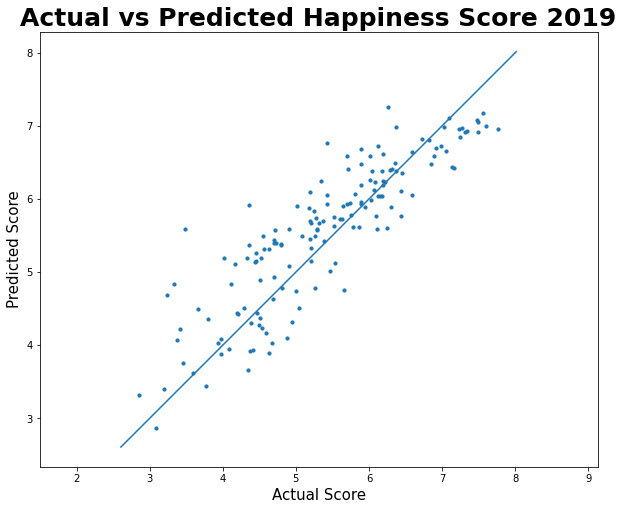

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(Y_test, score_pred ,s = 10)
plt.xlabel('Actual Score',fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Actual vs Predicted Happiness Score 2019',fontweight='bold',fontsize=25)

min = np.min([ax.get_xlim(), ax.get_ylim()])
max = np.max([ax.get_xlim(), ax.get_ylim()])

ax.plot([min, max], [min, max])
ax.axis('equal')

In [ ]:
# Comparing Actual vs Calculated Ranks
# (calculating ranks from predicted score values)

y = pd.DataFrame({'Country': testing["Country"].values, 'Actual Rank': testing["Rank"].values })
y['Predicted Rank'] = x['Predicted Score'].rank(ascending=False)
y['Predicted Rank'] = y['Predicted Rank'].astype(int)
y

,Country,Actual Rank,Predicted Rank
0,Finland,1,11
1,Denmark,2,6
2,Norway,3,2
3,Iceland,4,5
4,Netherlands,5,13
...,...,...,...
151,Rwanda,152,118
152,Tanzania,153,124
153,Afghanistan,154,154
154,Central African Republic,155,156


In [ ]:
#################################### How well/badly does the model work ##########################################

# Evaluate the correctness of your predictions based on the original “Score” column
print('Score:', lin_reg.score(X_test, Y_test))

Score: 0.7426353989015173


Prediction score is around 74% which is quite decent

In [ ]:
########################################### Root mean squared error #############################################

MSE = mean_squared_error(Y_test, score_pred, squared=False)
RMSE = np.sqrt(MSE) 
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Squared Error: 0.5628852790041102
Root Mean Squared Error: 0.7502568087022671


In [ ]:
# According to the sklearn library:
# Mean squared error return: the best value is 0.0 

# Lower values of MSE indicate better fit.
# Since we have quite a low value of 0.56 (close to zero) that means our model did a good job at predicting
# happiness scores and therefore accurate ranks

## **K Nearest Neighbor Regression**
### Model 2 (by Rahul Raja)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

gridsearch.best_params_

## Reports best k value is 6

{'n_neighbors': 6}

In [ ]:


knn_model = KNeighborsRegressor(n_neighbors=6) ## can change this paramter

knn_model.fit(X_train, Y_train)

test_preds = knn_model.predict(X_test)
score_pred = test_preds.flatten()
score_pred

array([7.25583333, 7.25283333, 7.09716667, 7.31216667, 6.78366668,
       6.65933335, 6.78366668, 6.89916667, 7.05716667, 6.65850001,
       7.009     , 6.45966667, 6.37216667, 6.75383333, 6.30849999,
       6.82016667, 6.34916666, 6.30849999, 6.46849998, 6.5715    ,
       7.24516665, 6.599     , 6.26133333, 6.37116666, 6.40716664,
       6.65333333, 5.71199998, 6.38700001, 6.47916664, 6.38449998,
       6.31183333, 5.77366667, 6.4905    , 6.10783337, 5.82650002,
       6.38466668, 6.36400003, 6.41949998, 6.08316668, 6.37216667,
       5.814     , 5.75950005, 6.48366667, 6.5805    , 5.75350002,
       6.1515    , 6.49816667, 6.10166667, 6.18983333, 6.34566667,
       6.58099999, 6.5785    , 5.65700004, 5.70383334, 6.48733333,
       6.05766665, 6.51583333, 6.07666667, 5.75416668, 5.89666666,
       5.67666666, 5.58100002, 5.92233331, 6.29433333, 6.24966667,
       6.27383333, 5.33816667, 5.54516667, 5.52216665, 5.71983333,
       5.17933332, 5.81116667, 5.59183333, 5.41566667, 6.25166

In [ ]:
x = pd.DataFrame({'Country': testing["Country"].values, 'Actual Score': Y_test['Score'].tolist(), 'Predicted Score': score_pred})
x

,Country,Actual Score,Predicted Score
0,Finland,7.769,7.255833
1,Denmark,7.600,7.252833
2,Norway,7.554,7.097167
3,Iceland,7.494,7.312167
4,Netherlands,7.488,6.783667
...,...,...,...
151,Rwanda,3.334,4.533500
152,Tanzania,3.231,4.448000
153,Afghanistan,3.203,3.710333
154,Central African Republic,3.083,3.303000


(2.3368200000000003, 8.28518, 2.3368200000000003, 8.28518)

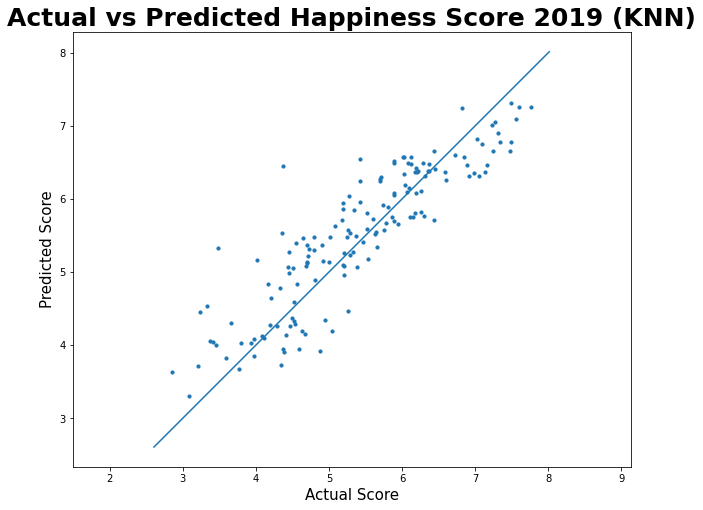

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(Y_test, score_pred ,s = 10)
plt.xlabel('Actual Score',fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Actual vs Predicted Happiness Score 2019 (KNN)',fontweight='bold',fontsize=25)

min = np.min([ax.get_xlim(), ax.get_ylim()])
max = np.max([ax.get_xlim(), ax.get_ylim()])

ax.plot([min, max], [min, max])
ax.axis('equal')

In [ ]:
Actual = pd.DataFrame({'Country': testing["Country"].values, 'Actual': testing["Rank"].values })
Actual['Predicted'] = x['Predicted Score'].rank(ascending=False)
Actual['Predicted'] = Actual['Predicted'].astype(int)
Actual

,Country,Actual,Predicted
0,Finland,1,2
1,Denmark,2,3
2,Norway,3,5
3,Iceland,4,1
4,Netherlands,5,11
...,...,...,...
151,Rwanda,152,123
152,Tanzania,153,125
153,Afghanistan,154,153
154,Central African Republic,155,156


In [ ]:
print('Score:', knn_model.score(X_test, Y_test)) ## Accuracy of around 77.30%

Score: 0.773050524334173


In [ ]:
test_mse = mean_squared_error(Y_test, score_pred, squared=False)
test_rmse = np.sqrt(test_mse)
print('Root Mean Squared Error:', test_rmse)

Root Mean Squared Error: 0.7270345307165752


# **Random Forest Regression**

---




Model 3 (by Acero)

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# make instance of Regressor

training2 = happiness[happiness.Year < 2019]

Y_training2 = training['Score']
X_training2 = training2[["GDP per Capita", "Life Expectancy", 'Family/Social Support', 'Freedom']]




regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_training2, Y_training2)
prediction = regressor.predict(X_test)
prediction = prediction.flatten()
prediction

array([6.18689   , 6.18919   , 6.45103   , 6.17094   , 6.13121   ,
       6.27309   , 6.19938   , 6.19413   , 6.16344999, 5.90277001,
       6.08151   , 6.46843   , 6.22733998, 5.98183002, 6.09891   ,
       5.84060003, 5.84103002, 6.01314001, 6.32539999, 6.345     ,
       7.26867994, 6.12709   , 6.59627   , 6.07756   , 6.09478997,
       6.00627999, 5.78578999, 6.53526998, 6.79410998, 6.18648998,
       5.98529   , 5.27415   , 6.07559   , 6.38071001, 5.68678999,
       5.90976001, 6.74468999, 6.19823999, 6.10709003, 6.26641   ,
       5.7553    , 5.82605002, 6.65630999, 6.41417   , 5.98329   ,
       5.92499   , 6.41711998, 6.12583   , 6.30029   , 6.1312    ,
       6.53611003, 6.65967   , 5.64344003, 5.64020003, 6.39505001,
       6.06945   , 6.14005001, 6.09831   , 6.049     , 6.09203001,
       5.69286   , 5.57134003, 5.83231   , 6.20592   , 6.62942999,
       6.07930001, 5.03757   , 5.91715   , 5.52635997, 5.08306   ,
       5.28053999, 6.15134   , 5.39191   , 5.12658   , 5.56564

In [ ]:
# Comparing values
compareFrame = pd.DataFrame({'Country': testing["Country"].values, 'Actual Score': Y_test['Score'].tolist(), 'Predicted Score': prediction})
compareFrame

,Country,Actual Score,Predicted Score
0,Finland,7.769,6.18689
1,Denmark,7.600,6.18919
2,Norway,7.554,6.45103
3,Iceland,7.494,6.17094
4,Netherlands,7.488,6.13121
...,...,...,...
151,Rwanda,3.334,4.52363
152,Tanzania,3.231,4.91689
153,Afghanistan,3.203,3.71499
154,Central African Republic,3.083,3.13729


(2.3368200000000003, 8.28518, 2.3368200000000003, 8.28518)

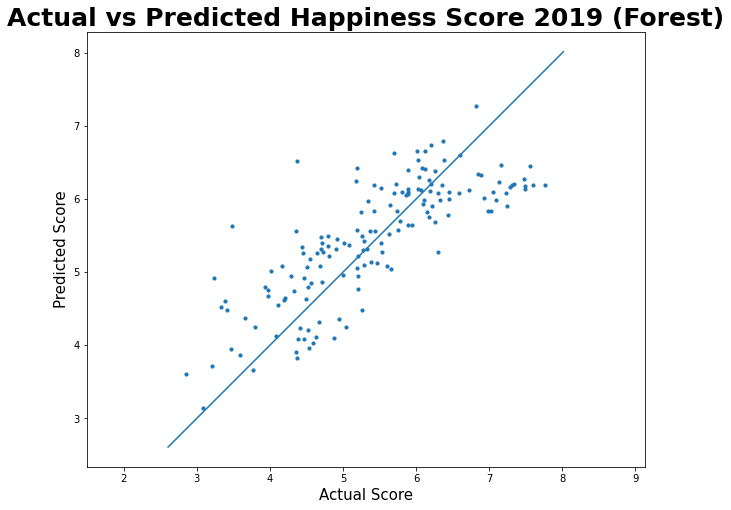

In [ ]:
# Figure with scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(Y_test, prediction, s = 10)
plt.xlabel('Actual Score',fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Actual vs Predicted Happiness Score 2019 (Forest)',fontweight='bold',fontsize=25)

min = np.min([ax.get_xlim(), ax.get_ylim()])
max = np.max([ax.get_xlim(), ax.get_ylim()])

ax.plot([min, max], [min, max])
ax.axis('equal')

In [ ]:
Actual = pd.DataFrame({'Country': testing["Country"].values, 'Actual': testing["Rank"].values })
Actual['Predicted'] = compareFrame['Predicted Score'].rank(ascending=False)
Actual['Predicted'] = Actual['Predicted'].astype(int)
Actual

,Country,Actual,Predicted
0,Finland,1,31
1,Denmark,2,30
2,Norway,3,12
3,Iceland,4,33
4,Netherlands,5,37
...,...,...,...
151,Rwanda,152,132
152,Tanzania,153,117
153,Afghanistan,154,153
154,Central African Republic,155,156


In [ ]:
print('Score:', regressor.score(X_test, Y_test))

Score: 0.6167312000408858


**Accuracy of 61.67%, the worst of the three models**

In [ ]:
test_mse = mean_squared_error(Y_test, prediction, squared=False)
test_rmse = np.sqrt(test_mse)
print('Root Mean Squared Error:', test_rmse)

Root Mean Squared Error: 0.8287978372128348
